#### Analysis of job ourcomes of graduated students from 2010 and 2012

The dataset comes from FiveThirtyEight's processed version of data released by Amerian Community Survey.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

We will use visualizaiton to do some exploratory analysis and answer more questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [6]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [9]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [14]:
raw_data_count = recent_grads.shape[0]
raw_data_count

172

Some columns have one record of null value. Matplotlib expect columns of value have matching lengths and missing values will cause matplot lib to throw errors.

In [15]:
recent_grads = recent_grads.dropna()

In [18]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

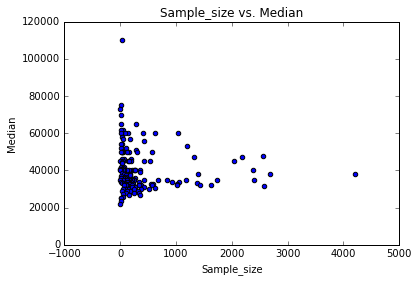

In [22]:
(recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
     .set_title("Sample_size vs. Median")
)

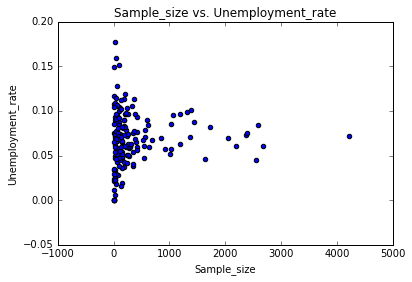

In [23]:
(recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
     .set_title("Sample_size vs. Unemployment_rate")
)

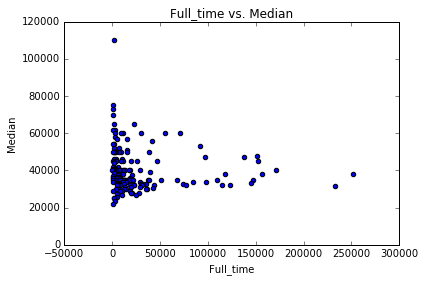

In [24]:
(recent_grads.plot(x='Full_time', y='Median', kind='scatter')
     .set_title("Full_time vs. Median")
)

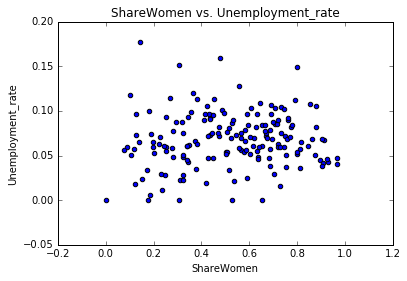

In [25]:
(recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
     .set_title("ShareWomen vs. Unemployment_rate")
)

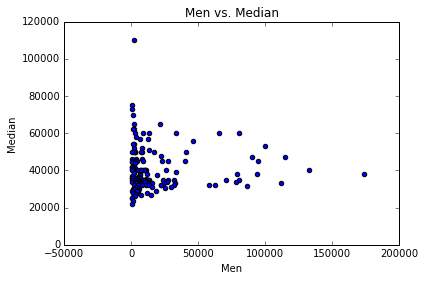

In [28]:
(recent_grads.plot(x='Men', y='Median', kind='scatter')
     .set_title("Men vs. Median")
)

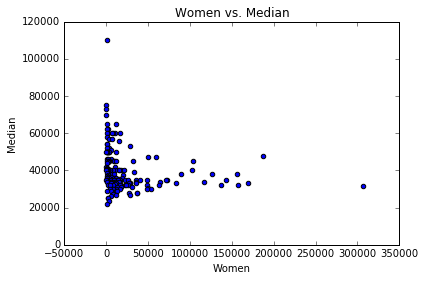

In [29]:
(recent_grads.plot(x='Women', y='Median', kind='scatter')
     .set_title("Women vs. Median")
)

#### Findings from the plot so far:
- There isn't strong correlation between the popularity of a major and the employment situation after graduation(unemployment rate and salary).
- The share of women in the major doesn't indicate a higher salary after graduation.
- There isn't direct link between number of full-time emploee and median salary.

Note: The numbers of sample size, including parted by men or women, has a few large values that expand the plots and make most values too concentrated to look at actual correlation. We could only plot a scatterplot on selected values. 

#### Discover the distributed values of several columns

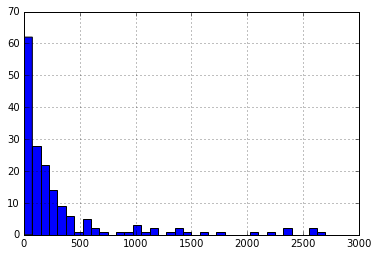

In [33]:
recent_grads["Sample_size"].hist(bins=40, range=(0,3000))

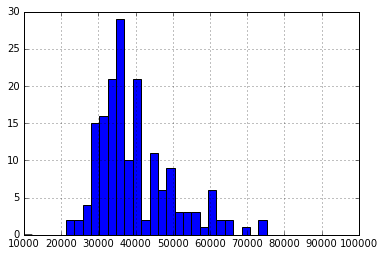

In [36]:
recent_grads["Median"].hist(bins=40, range=(10000,100000))

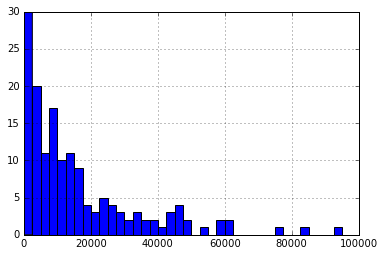

In [40]:
recent_grads["Employed"].hist(bins=40, range=(0,100000))

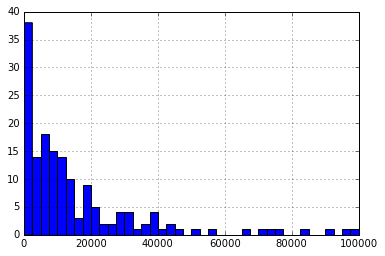

In [47]:
recent_grads["Full_time"].hist(bins=40, range=(0,100000))

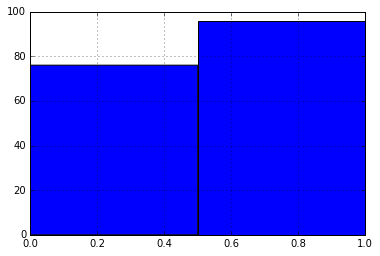

In [88]:
recent_grads["ShareWomen"].hist(bins=2, range=(0,1))

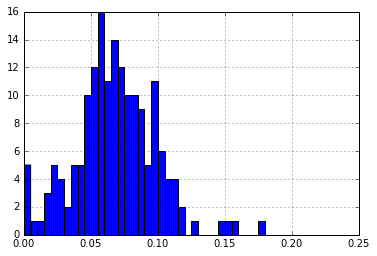

In [55]:
recent_grads["Unemployment_rate"].hist(bins=40, range=(0,0.2))

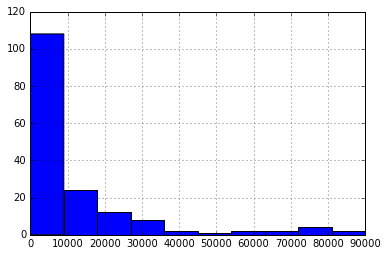

In [62]:
recent_grads["Men"].hist(bins=10, range=(0,90000))

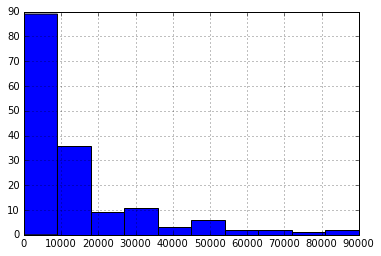

In [63]:
recent_grads["Women"].hist(bins=10, range=(0,90000))

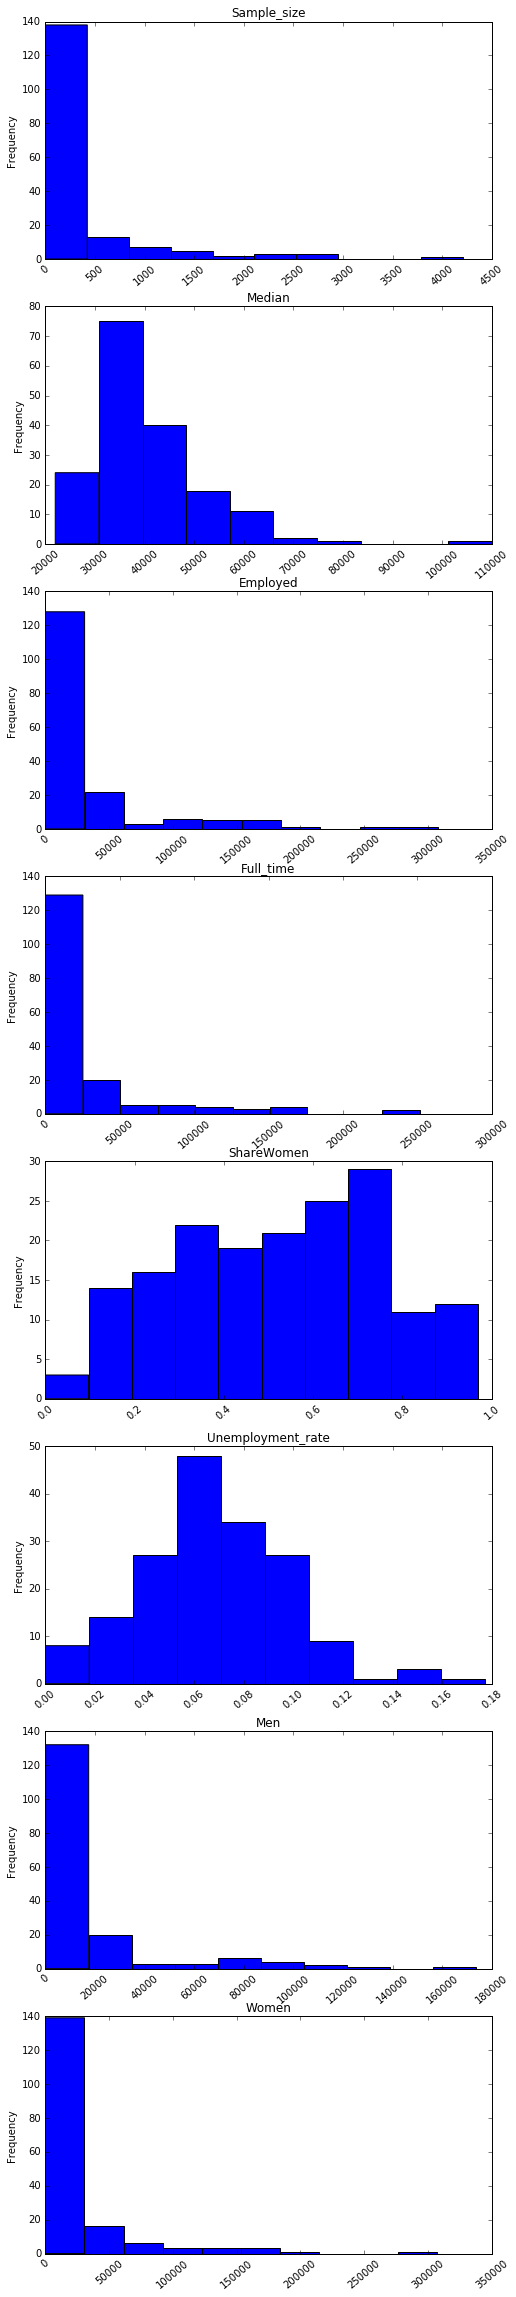

In [82]:
#Above can be shown in one figure with subplots

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig= plt.figure(figsize=(8,40))
for r in range(0,8):
    ax = fig.add_subplot(8,1,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40) 
    ax.set_title(cols[r])

#### Findings: 
- There are more than 50% of the majors that are women dominated. 
- The most common median salary are from 30-40K.

#### Use Scatter Matrix to have a comprehensive view of different columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98687142b0>,
      dtype=object)

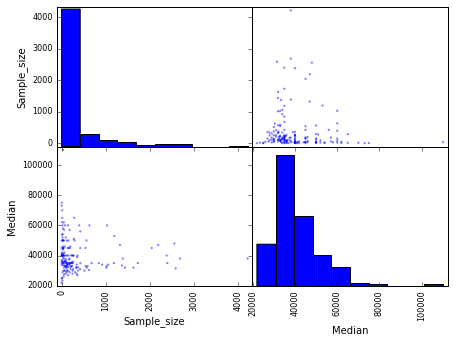

In [103]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(7,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98668a2da0>,
      dtype=object)

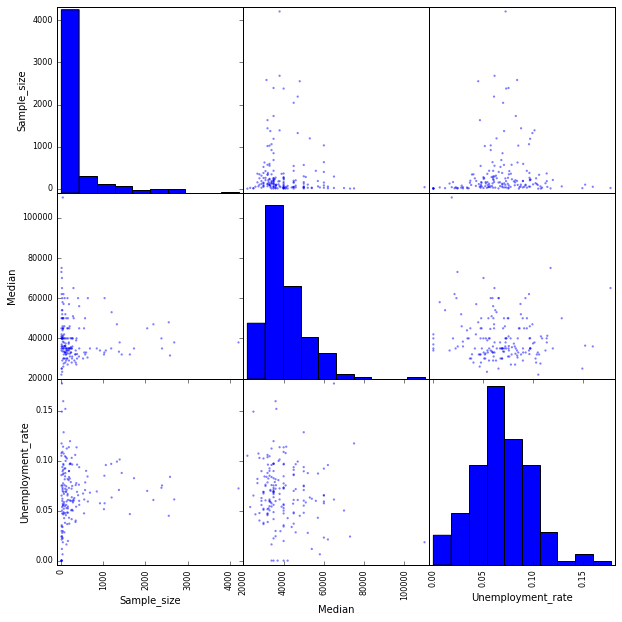

In [105]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9866191908>,
      dtype=object)

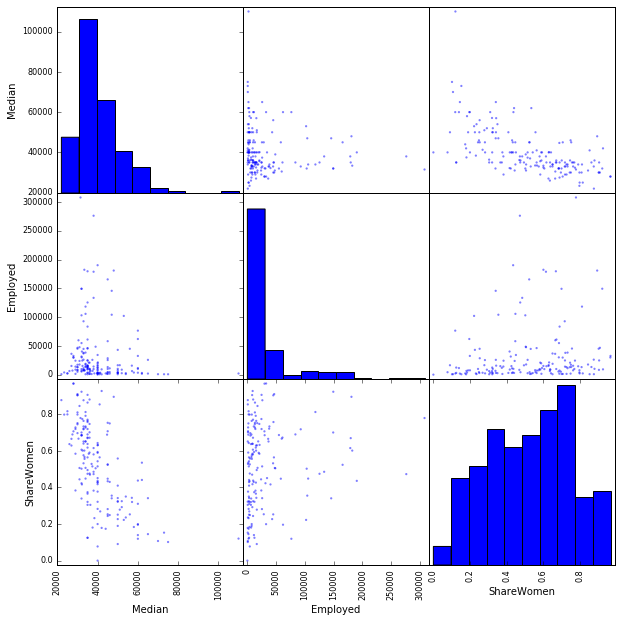

In [109]:
scatter_matrix(recent_grads[["Median","Employed","ShareWomen"]],figsize=(10,10))

#### Findings so far:
- There is a slight correlation between median salary and how men donimante the major. The median salary is slightly higher in male dominated majors. 

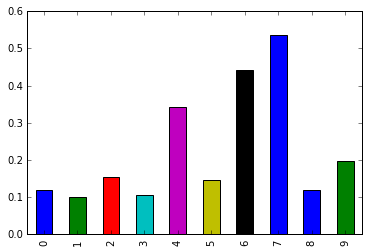

In [113]:
recent_grads[:10]["ShareWomen"].plot.bar(x='Major', y='ShareofWomen')

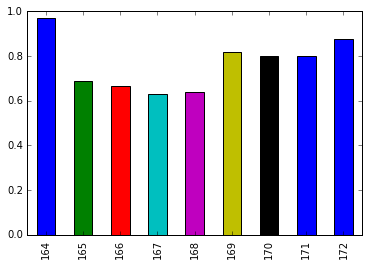

In [114]:
recent_grads[163:]["ShareWomen"].plot.bar(x='Major', y='ShareofWomen')